In [1]:
import pandas as pd

df = pd.read_csv("./dataset.csv")
df.head()

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,NaN,NaN,Miljan David Tanic,NaN,NaN,205 grams


In [2]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'dateAdded',
       'dateUpdated', 'dimension', 'ean', 'keys', 'manufacturer',
       'manufacturerNumber', 'name', 'prices', 'reviews.date',
       'reviews.doRecommend', 'reviews.numHelpful', 'reviews.rating',
       'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.userCity', 'reviews.userProvince', 'reviews.username', 'sizes',
       'upc', 'weight'],
      dtype='object')

In [3]:
df.brand.value_counts()

brand
Amazon    1585
Moshi       12
Name: count, dtype: int64

In [4]:
df = df.loc[df["brand"]=="Amazon"]
df = df.drop(columns=["id", "asins","categories", "colors","dateAdded",	"dateUpdated",	"dimension",	"ean",	"keys",	"manufacturer",	"manufacturerNumber", "reviews.sourceURLs", "reviews.userCity",	"reviews.userProvince",	"reviews.username",	"sizes",	"upc",	"weight",	"prices",	"reviews.date",	"reviews.doRecommend",	"reviews.numHelpful", "brand", "reviews.title"])


In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["name_vectors"] = le.fit_transform(df.name)

In [6]:
df

,name,reviews.rating,reviews.text,name_vectors
0,Kindle Paperwhite,5.0,I initially had trouble deciding between the p...,55
1,Kindle Paperwhite,5.0,Allow me to preface this with a little history...,55
2,Kindle Paperwhite,4.0,I am enjoying it so far. Great for reading. Ha...,55
3,Kindle Paperwhite,5.0,I bought one of the first Paperwhites and have...,55
4,Kindle Paperwhite,5.0,I have to say upfront - I don't like coroporat...,55
...,...,...,...,...
1592,Alexa Voice Remote for Amazon Fire TV and Fire...,3.0,This is not the same remote that I got for my ...,1
1593,Alexa Voice Remote for Amazon Fire TV and Fire...,1.0,I have had to change the batteries in this rem...,1
1594,Alexa Voice Remote for Amazon Fire TV and Fire...,1.0,"Remote did not activate, nor did it connect to...",1
1595,Alexa Voice Remote for Amazon Fire TV and Fire...,3.0,It does the job but is super over priced. I fe...,1


In [8]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [11]:
def preprocess(text):
    doc = nlp(text)
    result = ' '.join([token.lemma_.lower() for token in doc if not token.is_punct and not token.is_stop])
    return result

In [12]:
df["Clean_reviews"] = df["reviews.text"].apply(preprocess)

In [14]:
df = df[df["reviews.rating"].notna()]
df["sentiments"] = df["reviews.rating"].apply(lambda x: 1 if x>=4 else 0 )

C:\Users\akraj\AppData\Local\Temp\ipykernel_10436\2918517370.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sentiments"] = df["reviews.rating"].apply(lambda x: 1 if x>=4 else 0 )


In [15]:
df

,name,reviews.rating,reviews.text,name_vectors,Clean_reviews,sentiments
0,Kindle Paperwhite,5.0,I initially had trouble deciding between the p...,55,initially trouble decide paperwhite voyage rev...,1
1,Kindle Paperwhite,5.0,Allow me to preface this with a little history...,55,allow preface little history casual reader own...,1
2,Kindle Paperwhite,4.0,I am enjoying it so far. Great for reading. Ha...,55,enjoy far great read original fire 2012 fire e...,1
3,Kindle Paperwhite,5.0,I bought one of the first Paperwhites and have...,55,buy paperwhites pleased constant companion sup...,1
4,Kindle Paperwhite,5.0,I have to say upfront - I don't like coroporat...,55,upfront like coroporate hermetically close stu...,1
...,...,...,...,...,...,...
1592,Alexa Voice Remote for Amazon Fire TV and Fire...,3.0,This is not the same remote that I got for my ...,1,remote get alexa echo control volume think rem...,0
1593,Alexa Voice Remote for Amazon Fire TV and Fire...,1.0,I have had to change the batteries in this rem...,1,change battery remote twice month purchase mar...,0
1594,Alexa Voice Remote for Amazon Fire TV and Fire...,1.0,"Remote did not activate, nor did it connect to...",1,remote activate connect box poorly design remo...,0
1595,Alexa Voice Remote for Amazon Fire TV and Fire...,3.0,It does the job but is super over priced. I fe...,1,job super price feel like offer replacement re...,0


In [16]:
from sklearn.model_selection import train_test_split

X_test, X_train, y_test, y_train = train_test_split(df.Clean_reviews,
                                                    df.sentiments,
                                                    test_size=0.2,
                                                    random_state=42)

In [17]:
X_test.head()

1174    like amazon tap portable time make thing lot easy
897              echo great music weather integrate house
1328    love echo tap personal alarm inform today weat...
966          work like echo portable great stuff describe
1167    ultimate bluetooth speaker multiple amazon ech...
Name: Clean_reviews, dtype: object

In [19]:
y_test.head()

1174    1
897     1
1328    1
966     1
1167    1
Name: sentiments, dtype: int64

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ("vectorizer", TfidfVectorizer()),
    ("model", LogisticRegression())
])

clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('model', LogisticRegression())])

In [21]:
y_pred = clf.predict(X_test)

Logistic Regression

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Accuracy Score:  0.8701716738197425


In [23]:
print("Classification Report: ", classification_report(y_test, y_pred))

Classification Report:                precision    recall  f1-score   support

           0       1.00      0.21      0.35       154
           1       0.87      1.00      0.93       778

    accuracy                           0.87       932
   macro avg       0.93      0.61      0.64       932
weighted avg       0.89      0.87      0.83       932



In [24]:
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))

Confusion Matrix:  [[ 33 121]
 [  0 778]]


Naive Bayes

In [26]:
from sklearn.naive_bayes import MultinomialNB
clf = Pipeline([
    ("vectorizer", TfidfVectorizer()),
    ("model", MultinomialNB())
])

clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()), ('model', MultinomialNB())])

In [27]:
y_pred = clf.predict(X_test)

In [28]:
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Accuracy Score:  0.8701716738197425


In [29]:
print("Classification Report: ", classification_report(y_test, y_pred))

Classification Report:                precision    recall  f1-score   support

           0       1.00      0.21      0.35       154
           1       0.87      1.00      0.93       778

    accuracy                           0.87       932
   macro avg       0.93      0.61      0.64       932
weighted avg       0.89      0.87      0.83       932



In [30]:
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))

Confusion Matrix:  [[ 33 121]
 [  0 778]]


Visualization of frequent words

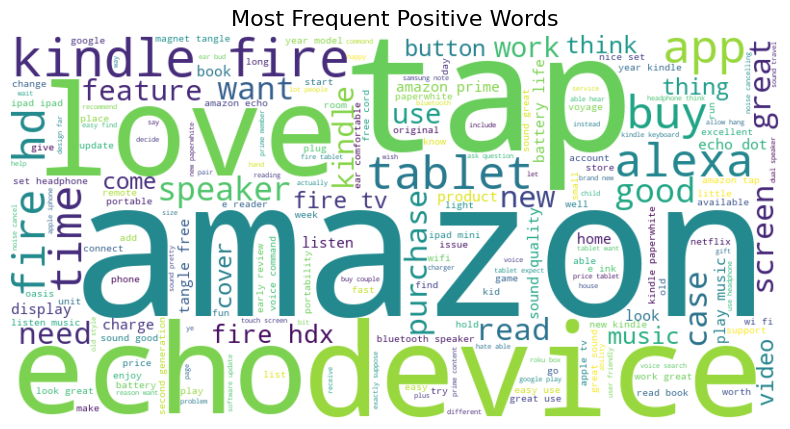

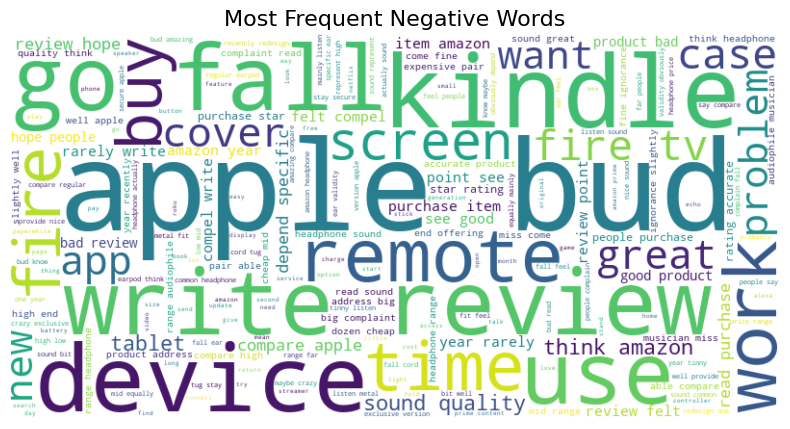

In [32]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def plot_wordcloud(reviews, title):
    text = " ".join(reviews)
    wc = WordCloud(width=800, height=400, background_color="white").generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=16)
    plt.show()

# Positive reviews
plot_wordcloud(df[df["sentiments"]==1]["Clean_reviews"], "Most Frequent Positive Words")

# Negative reviews
plot_wordcloud(df[df["sentiments"]==0]["Clean_reviews"], "Most Frequent Negative Words")

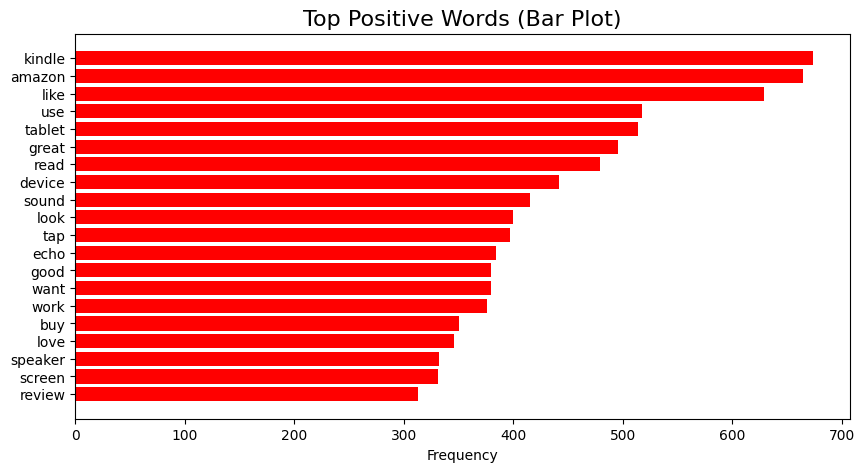

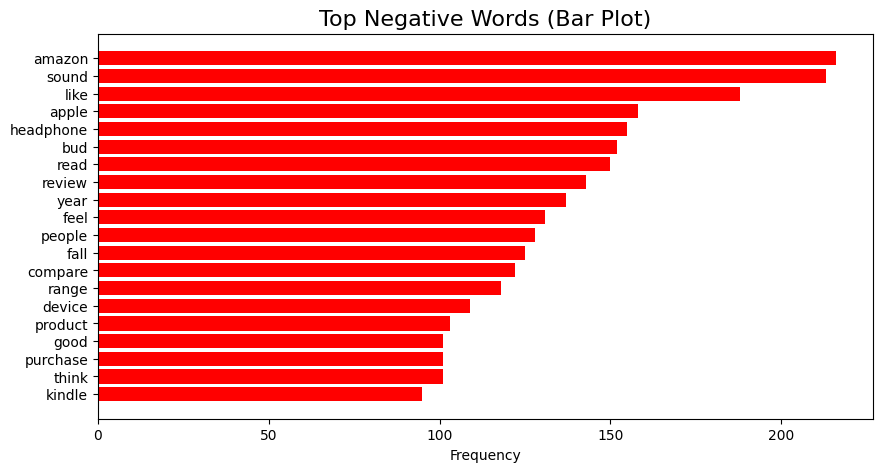

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

def plot_top_words(reviews, title, n=20):
    vectorizer = CountVectorizer(stop_words="english")
    X = vectorizer.fit_transform(reviews)
    word_counts = X.toarray().sum(axis=0)
    vocab = vectorizer.get_feature_names_out()
    
    word_freq = dict(zip(vocab, word_counts))
    top_words = Counter(word_freq).most_common(n)
    
    words, counts = zip(*top_words)
    plt.figure(figsize=(10,5))
    plt.barh(words[::-1], counts[::-1], color="red")
    plt.title(title, fontsize=16)
    plt.xlabel("Frequency")
    plt.show()

# Top positive words
plot_top_words(df[df["sentiments"]==1]["Clean_reviews"], "Top Positive Words (Bar Plot)")

# Top negative words
plot_top_words(df[df["sentiments"]==0]["Clean_reviews"], "Top Negative Words (Bar Plot)")